# Лабораторная работа № 3
## Метод k ближайших соседей

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Задание 1.** Создайте два набора точек принадлежащих двумерным нормальным распределениям:
- с центром $(-1, 1)$ и матрицей ковариации $\begin{pmatrix} 1 & 1 \\ -1 & 1 \end{pmatrix}$;
- с центром $(1, -1)$ и  матрицей ковариации $\begin{pmatrix} 2 & -2 \\ 2 & 2 \end{pmatrix}$.

Количество точек в каждом наборе - 500. Постройте график с полученными точками, где принадлежность к набору будет обозначена определенным цветом. Подсказка: вам пригодится функция `numpy.random.multivariate_normal`

/tmp/ipykernel_22371/722388013.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X1 = np.random.multivariate_normal([-1,1], [[1,1],[-1,1]], 500)
/tmp/ipykernel_22371/722388013.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X2 = np.random.multivariate_normal([1,-1], [[2,-2],[2,2]], 500)


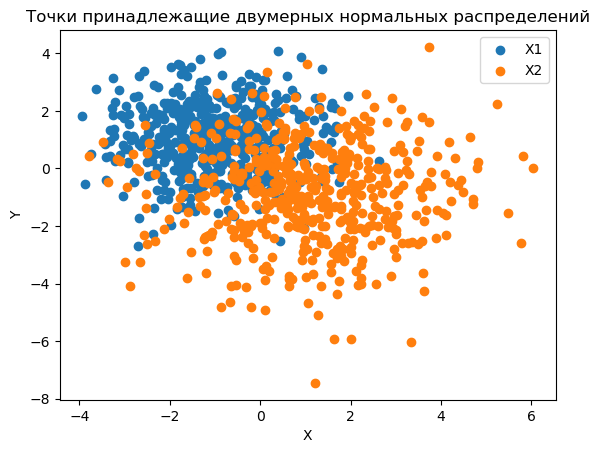

In [2]:
# ваш код здесь
X1 = np.random.multivariate_normal([-1,1], [[1,1],[-1,1]], 500)
X2 = np.random.multivariate_normal([1,-1], [[2,-2],[2,2]], 500)

plt.scatter(X1[:, 0], X1[:, 1], label='X1')
plt.scatter(X2[:, 0], X2[:, 1], label='X2')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Точки принадлежащие двумерных нормальных распределений')
plt.legend()
plt.show()

**Задание 2.** Подготовьте обучающую выборку и тестовые данные, считая, что первое распределение - это класс $0$, а второе - $1$. Обучающая выборка должна представлять собой массив X_train пар координат размером $1000 \times 2$ и массив меток классов ($0$ или $1$) размером $1000 \times 1$. Количество представителей обоих классов должно быть одинаковым - $500$.

Тестовая выборка X_test, y_test строится аналогично. Колличество образцов из первого и второго классов в ней - по 200 штук. Таким образом, размеры X_test - $400 \times 2$, y_test - $400 \times 1$

In [3]:
# ваш код здесь
X = np.vstack((X1,X2))
shi = np.random.permutation(X.shape[0])
X = X[shi]
Y = np.vstack((
    np.zeros((500,1)),
    np.ones((500,1))
))[shi]
print("X shape:", X.shape)
print("Y shape:", Y.shape)

X_test = np.vstack((
    np.random.multivariate_normal([-1,1], [[1,1],[-1,1]], 200),
    np.random.multivariate_normal([1,-1], [[2,-2],[2,2]], 200)
))
shi = np.random.permutation(X_test.shape[0])
X_test[shi]
Y_test = np.vstack((
    np.zeros((200,1)),
    np.ones((200,1))
))[shi]
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X shape: (1000, 2)
Y shape: (1000, 1)
X_test shape: (400, 2)
Y_test shape: (400, 1)


/tmp/ipykernel_22371/1120823506.py:13: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  np.random.multivariate_normal([-1,1], [[1,1],[-1,1]], 200),
/tmp/ipykernel_22371/1120823506.py:14: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  np.random.multivariate_normal([1,-1], [[2,-2],[2,2]], 200)


**Задание 3.** При помощи объекта `sklearn.neighbors.KNeighborsClassifier` постройте классический невзвешенный kNN-классификатор при k = 1. Получите массив предсказанных меток классов для тестового набора. Подсчитайте долю правильных ответов в тестовом наборе.

In [4]:
# ваш код здесь
from sklearn import neighbors, metrics

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, Y)

y = knn.predict(X_test)

print("acc:", metrics.accuracy_score(Y_test, y))

acc: 0.53


/usr/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**Задание 4.** Познакомьтесь с функциями из модуля `sklearn.metrics`. Постройте матрицу рассеяния (confusion matrix) для ваших тестовых данных. Какую информацию она несет? Воспользуйтесь функцией `sklearn.metrics.plot_confusion_matrix` для того, чтобы визуализировать вашу матрицу рассеяния.

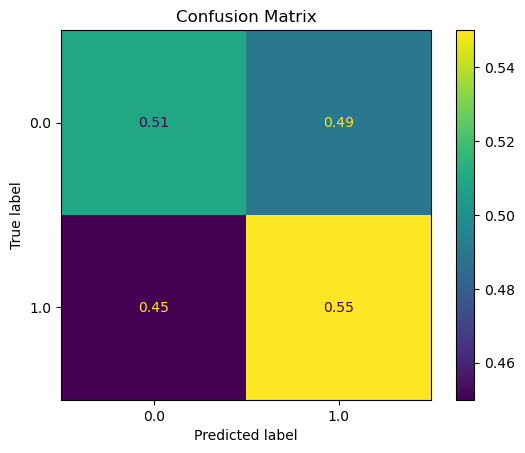

In [6]:
# ваш код здесь
conf_matrix = metrics.confusion_matrix(Y_test, y)

# Визуализация матрицы рассеяния
chart = metrics.ConfusionMatrixDisplay.from_estimator(knn, X_test, Y_test, normalize='true')
chart.ax_.set_title('Confusion Matrix')
plt.show()

**Задание 5.** В модуле `sklearn.model_selection` расположены вспомогательные функции для проведения валидации. Основные способы разбиения обучающей выборки на непосредственно обучение и на валидацию следующие:

- Отложенная выборка `held-out/hold-out set`. При таком подходе мы оставляем какую-то долю обучающей выборки, от 20% до 40%, обучаем модель на остальных данных и считаем некоторую метрику качества модели, например долю правильных ответов в задаче классификации на отложенной выборке;
- Кроссвалидация `K-Fold`. Обучающая выборка разбивается на k частей. Последовательно каждая из них убирается из обучения, а после построения модели на ней производится проверка;
- Кроссвалидация `Leave-one-out`. Крайний случай `K-Fold`, когда один образец убирается, по остальным строится модель и проверяется на изъятом образце.

Используйте разбиение обучающей выбоки на обучение и валидацию для оценки единственного числового *гиперпараметра* модели - величины $k$ в методе kNN. Для этого постройте графики зависимости качества обучения (accuracy) методами `LOO` и `K-Fold` от $k$. Какое значение нужно выбрать для наилучшей классификации?

Используйте два варианта метода kNN - без взвешивания (или, по другому, с одинаковыми весами, `weights = 'uniform'`) и с весами, обратно пропорциональными расстоянию ${\rho(.,.)}$ (`weights = 'distance'`).

Проверьте, что величина accuracy является минимальной для полученного $k$ и на тестовом наборе.

In [164]:
# ваш код здесь

**Задание 6.** постройте график с границами между классами (decision boundaries), которые получены методом kNN и точками обучающего множества. Вам понадобятся функции `matplotlib.pyplot.contourf` и `numpy.meshgrid`

In [165]:
# ваш код здесь

## Работа с базой данных изображений CIFAR-10

Далее мы применим разработанный нами класс для классификации набора данных CIFAR-10. Он представляет собой два массива - обучающий и тестовый, содержащие 50000 и 10000 цветных трехканальных RGB изображений размером 32x32 пикселя. Колличество классов - 10. 

Набор данных можно скачать отсюда: https://www.cs.toronto.edu/~kriz/cifar.html Вам нужна "CIFAR-10 python version" (https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz)

Архив содержит файлы с обучающими данными `data_batch_1`, `data_batch_2`, ..., `data_batch_5` и один файл с тестовыми данными `test_batch`. Каждый из них представляет собой "pickled"-объект, который создан при помощи библиотеки `pickle`. Она как правило применяется при необходимости загрузки/выгрузки объектов языка Питон в так называемом сериализованном виде (подробнее: https://docs.python.org/3/library/pickle.html). Функция, который позволит вам десериализовать каждый из файлов архива, выглядит следующим образом:

In [166]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# data_dictionary = unpickle('... path to pickle file ...')

Заггруженные при помощи функции `unpickle` данные содержат в себе объекты-словари со следующими ключами:
- `data` - массив numpy типа uint8 размером 10000x3072. Каждый ряд в нем содержит цветное RGB изображение размером 32x32 пикселя. Первые 1024 элемента - красный канал, вторые 1024 элемента - зеленый канал, а последние 1024 - синий канал соответственно. Значения записаны по рядам.
- `labels` - a список из 10000 чисел в диапазоне от 0 до 9. Число по i-му индексу - это номер метки класса i-го изображения в массиве `data`.

Также в архиве расположен файл `batches.meta`. Он также содержит сериализованный словарь. В этом словаре нас будет интересовать только один из ключей:
- `label_names` - список из 10 элементов, содержащий текстовые имена классов. К примеру, `label_names[0] == "airplane"`, `label_names[1] == "automobile"`, и т.д.

**Задание 7.** Вашей первой задачей будет выгрузить данные из архива. Вы должны получить 6 массивов и 6 списков. Первые пять из них нужно объединить в обучающую выборку размером 50000 элементов. Таким образом, в результате у вас должно остаться 4 numpy-массива: `X_train` и `y_train`, `X_test` и `y_test`. Также вам понадобятся метки классов, которые вы должны сохранить в список под названием `classes`.

In [167]:
# ваш код здесь

Если вы все сделали правильно, то следующий код должен вывести таблицу с примерами 10 изображений каждого класса:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,10)

num_classes = len(classes)
samples_per_class = 10

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(np.array(y_train) == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)

plt.show()

NameError: name 'classes' is not defined

**Задание 8.** Обучение и тестирование на выборке размером 50000 и 10000 элементов сложно осуществить на обычном компьютере, поэтому для дальнейшей работы вам нужно выбрать из обучающей выборки первые 5000 примеров, а из тестовой выборки - первые 500.

Далее следует преобразовать полученные многомерные массивы X_train и X_test в двумерные размерами (5000x3072 и 500x3072), где по каждой i-й строке будет располагаться вектор признаков i-го изображения. В нашем случае преобразование в вектор признаков будет тривиальным. Вы должны данные из всех цветных каналов превратить из матриц в одну длинную строку. Проще всего это сделать при помощи функции `numpy.reshape`. Подсказка: обратите внимание, что она может принимать в качестве аргумента значение -1.

После преобразований выведите в консоль новые размеры X_train и X_test. Значения должны быть (5000L, 3072L) и (500L, 3072L) Не забудьте про массивы меток y_train и y_test. Их тоже нужно усечь до 5000 и 500 соответственно

In [ ]:
# ваш код здесь

**Задание 9.** Подберите оптимальное значение k и метод взвешивания, дающие наилучшую точность предсказания с помощью метода k ближайших соседей. Используйте метод `k-Fold` при кросс-валидации для каждого k в диапазоне от 1 до 20. В результате вы должны получить зависимость точности (`accuracy`) от числа ближайших соседей для двух случаев: `weights = 'uniform'` и `weights = 'distance'`. Эти зависимости нужно построить в виде графиков, и найти по ним оптимальное значение k. 

In [ ]:
# ваш код здесь

**Задание 10.** Для выбранного оптимального значения k и метода взвешивания оцените точность работы классификатора на тестовой выборке X_test, обучаясь по всему набору X_train. Полученная величина - это и есть значение `accuracy` метода kNN для нашего набора данных. Постройте для тестового набора матрицу рассеяния, оси которой подпишите текстовыми метками классов. Проанализируйте полученную матрицу. Какие классы чаще неверно определяются вашей kNN-моделью?

In [ ]:
# ваш код здесь